# Part I - (Dataset Exploration Title)
## by (Henry Ije)

## Introduction
> This data contains information about 183,412 bike trips made in a bike sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [37]:
# Load in the dataset into a pandas dataframe, print statistics
fordbike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [38]:
# high-level overview of data shape and composition
print(fordbike.shape)
print(fordbike.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [39]:
# Check the first top 10 of data set
fordbike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [40]:
# Statistical description of data sets
fordbike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [41]:
# Overview of columns and data type
fordbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [42]:
# Check if Nan Values are present
fordbike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Data Wrangling
- Drop data with missing values
- Convert the start and end time column to DateTime
- Extract the hour, day, month and year columns from 
- Convert each feature to the appropriate data type
- Calculate member age from the member_birth_year

In [43]:
### Drop data with missing values
fordbike.dropna(inplace=True)

In [44]:
# Convert the start and end time column to Date Time
fordbike.start_time = pd.to_datetime(fordbike.start_time)
fordbike.end_time = pd.to_datetime(fordbike.end_time)

# Convert the bike id to string
fordbike.bike_id = fordbike.bike_id.astype(str)

# From the start and end column extract the day, month and year
import datetime as dt
fordbike["start_hour"] = fordbike["start_time"].dt.hour
fordbike["start_day"] = fordbike["start_time"].dt.day_name()
fordbike["start_month"] = fordbike["start_time"].dt.month_name()
fordbike["start_year"] = fordbike["start_time"].dt.year
fordbike["start_year"] = fordbike["start_time"].astype(str)

fordbike["end_hour"] = fordbike["end_time"].dt.hour
fordbike["end_day"] = fordbike["end_time"].dt.day_name()
fordbike["end_month"] = fordbike["end_time"].dt.month_name()
fordbike["end_year"] = fordbike["end_time"].dt.year
fordbike["end_year"] = fordbike["end_time"].astype(str)

In [45]:
# Calculate the age from the birth year
fordbike["member_birth_age"] = 2019 - fordbike["member_birth_year"]

In [46]:
# View to check if member age column was created 
fordbike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_hour,start_day,start_month,start_year,end_hour,end_day,end_month,end_year,member_birth_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,17,Thursday,February,2019-02-28 17:32:10.145,8,Friday,March,2019-03-01 08:01:55.975,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,12,Thursday,February,2019-02-28 12:13:13.218,5,Friday,March,2019-03-01 05:24:08.146,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,17,Thursday,February,2019-02-28 17:54:26.010,4,Friday,March,2019-03-01 04:02:36.842,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,23,Thursday,February,2019-02-28 23:54:18.549,0,Friday,March,2019-03-01 00:20:44.074,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,23,Thursday,February,2019-02-28 23:49:58.632,0,Friday,March,2019-03-01 00:19:51.760,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,No,0,Friday,February,2019-02-01 00:04:49.724,0,Friday,February,2019-02-01 00:12:50.034,23.0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,No,0,Friday,February,2019-02-01 00:05:34.744,0,Friday,February,2019-02-01 00:10:48.502,35.0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Yes,0,Friday,February,2019-02-01 00:06:05.549,0,Friday,February,2019-02-01 00:08:27.220,29.0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,No,0,Friday,February,2019-02-01 00:05:34.360,0,Friday,February,2019-02-01 00:07:54.287,31.0


In [47]:
# Additional statistical description
fordbike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_hour,end_hour,member_birth_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,1984.803135,13.456165,13.609533,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,10.118731,4.734282,4.748029,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000,0.000000,0.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,1980.000000,9.000000,9.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,1987.000000,14.000000,14.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,1992.000000,17.000000,18.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000,23.000000,23.000000,141.000000


### What is the structure of your dataset?

> There are 183,412 rows and 16 columns. There are some missing datas such as "start_station_id", "start_station_name", "end_station_id", "end_station_name", "member_birth_year", "member_gender_year". 

### What is/are the main feature(s) of interest in your dataset?

> From my opionion, the main features of interest are duration time, member_birth_year, start_time and end_time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features such as members_birth_age, duration_time, start_hour, start_day_start_month, members_birth_year

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables. 


## What is the proportion of user type ?

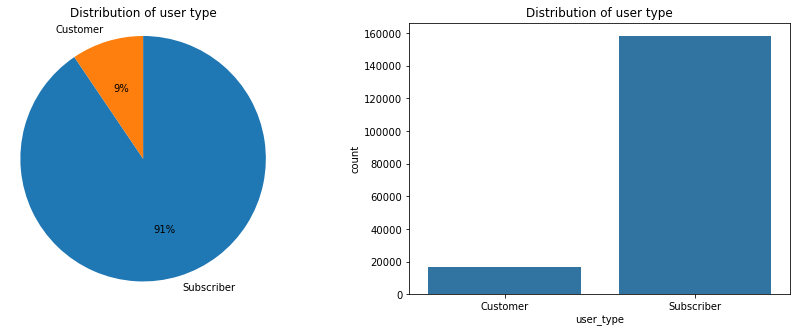

In [72]:
# A sublot of pie chart and bar chart
def pie_bar_plot():
   plt.figure(figsize=[15,5]);

   # Pie chart on the left
   plt.subplot(1,2,1);
   sorted_user = fordbike.user_type.value_counts();
   plt.pie(sorted_user, labels=sorted_user.index, startangle=90,autopct='%1.0f%%', counterclock=False);
   plt.axis("square");
   plt.title("Distribution of user type");

   # Barplot on the right
   plt.subplot(1,2,2);
   base_color = sb.color_palette()[0]
   sb.countplot(data=fordbike, x="user_type", color=base_color);
   plt.title("Distribution of user type");

pie_bar_plot()

> From the pie chart and bar chart shown above, it can be deduced that there are more subscribers compared to customers in our ford gobike data. 91 percent of riders are subscribers while 9 percent are customers.

## What is the distribution of duration in sec?

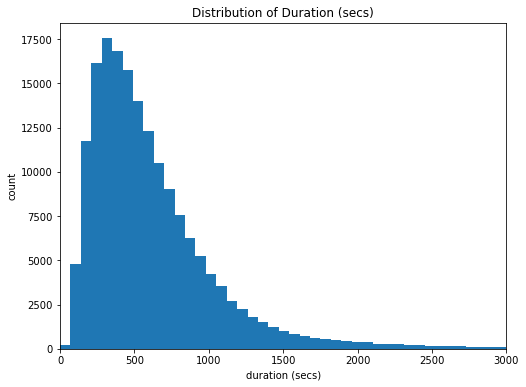

In [77]:
# Histogram showing the distribution of data
def histplot():
   bins = np.arange(0, fordbike["duration_sec"].max()+70, 70)
   plt.figure(figsize=[8, 6])
   plt.hist(data=fordbike, x="duration_sec", bins=bins);
   plt.xlabel("duration (secs)")
   plt.ylabel("count")
   plt.xlim(0, 3000)
   plt.title("Distribution of Duration (secs)");
histplot()

> The histogram is right skewed and the most frequent duration is between 400 secs 

## What is the distribution riders with respect to their age?

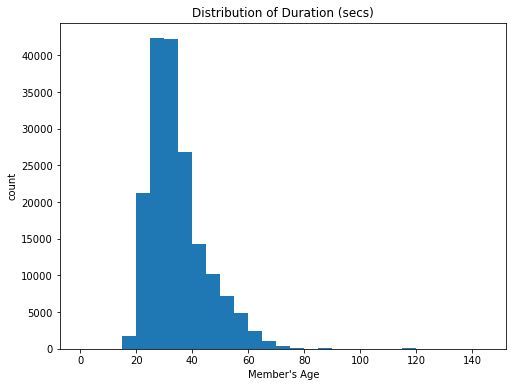

In [50]:
# Histogram showing the distribution of data
plt.figure(figsize=[8,6])
bins=np.arange(0, fordbike["member_birth_age"].max()+5, 5)
plt.hist(fordbike["member_birth_age"].dropna(), bins=bins);
plt.xlabel("Member's Age")
plt.ylabel("count")
plt.title("Distribution of Duration (secs)");

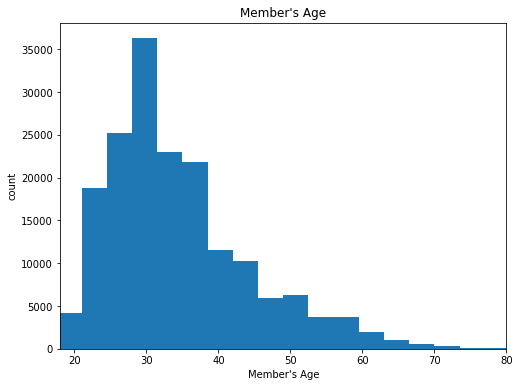

In [51]:
# Histogram showing the distribution of data
plt.figure(figsize=[8,6])
bins=np.arange(0, fordbike["member_birth_age"].max()+3.5, 3.5)
plt.hist(fordbike["member_birth_age"].dropna(), bins=bins);
plt.xlim(18, 80)
plt.xlabel("Member's Age")
plt.ylabel("count")
plt.title("Member's Age");

> The histogram is right skewed. From the histogram abive it is shown that riders with the most frequency are within their early 20's to their late 30's. 

### What gender is common among the rider?

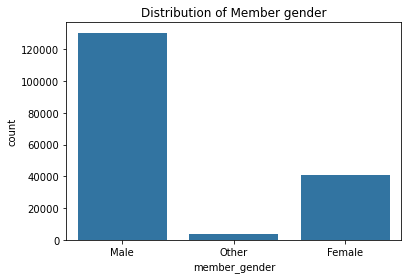

In [52]:
# Distribution of ride frequency by gender 
ax = sb.countplot(data=fordbike, x="member_gender", color=sb.color_palette()[0])
total=len(fordbike)
for a in ax.patches:
    percentage = "{:2f}%".format(100 * a.get_height()/total)
    x = a.get_height()+ a.get_width()/2
    y = a.get_height()+0.8
    ax.annotate(percentage, (x, y), ha="center")
    plt.title("Distribution of Member gender");


From the bar char, most of the riders are males. The gender male is common compared to the female and other genders

### What is the relationship between day of the week and number of rides?

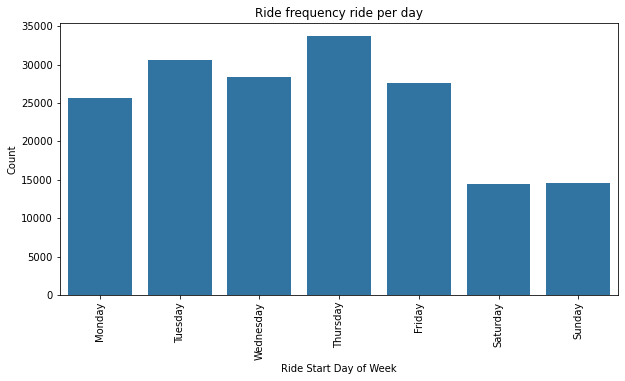

In [53]:
# Bar chart showing the ride frequency by day
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_week_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
fordbike['start_day'] = fordbike['start_day'].astype(days_of_week_cat)
plt.figure(figsize=[10, 5])
sb.countplot(data=fordbike, x='start_day', color=base_color);
plt.xlabel('Ride Start Day of Week');
plt.ylabel('Count');
plt.xticks(rotation=90);
plt.title("Ride frequency ride per day");

> From the bar chart above, most rides were taken on thursday followed by tuesday while saturday and sunday has the lowest number of rides.

### What time was most bike rides started?

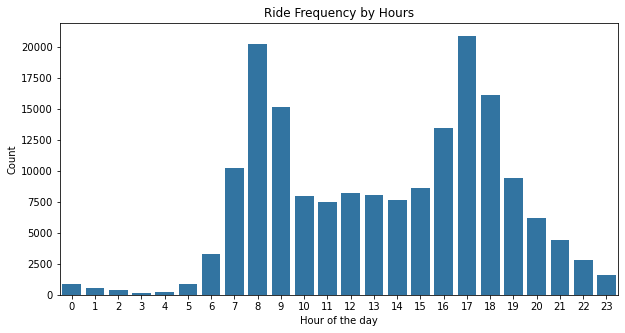

In [54]:
# Bar chart showing the ride frequency by day
plt.figure(figsize=[10, 5])
sb.countplot(data=fordbike, x='start_hour', color=base_color);
plt.xlabel('Hour of the day');
plt.ylabel('Count');
plt.title("Ride Frequency by Hours");

> Most rides were taken in the morning within the hour of 8 and 9 and in the evening within the hour and 17 and 18.

### What is the quantity of bike share for all trip

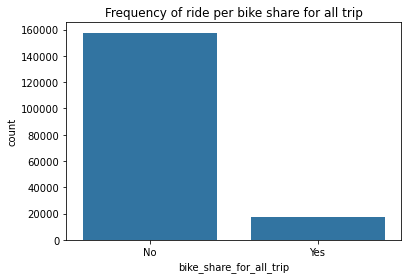

In [63]:
# Distribution of ride frequency by gender 
ax = sb.countplot(data=fordbike, x="bike_share_for_all_trip", color=sb.color_palette()[0])
total=len(fordbike)
for a in ax.patches:
    percentage = "{:2f}%".format(100 * a.get_height()/total)
    x = a.get_height()+ a.get_width()/2
    y = a.get_height()+0.8
    ax.annotate(percentage, (x, y), ha="center")
    plt.title("Frequency of ride per bike share for all trip");

> From the bar chart it can be seen that for bike share for all trip, there were more no compared to yes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The duration_sec and members_birth_age are right skewed. There are unusual points and a scale transformation was performed. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was untidy. So I did some tidiness. I calculated the members age by substracting the members birth age from 2019. I also changed some data types to the appropriate data type. I also added additional columns such as hour, day and month.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## What is the relationship between members age and duration time?

Text(0, 0.5, 'Duration time (sec)')

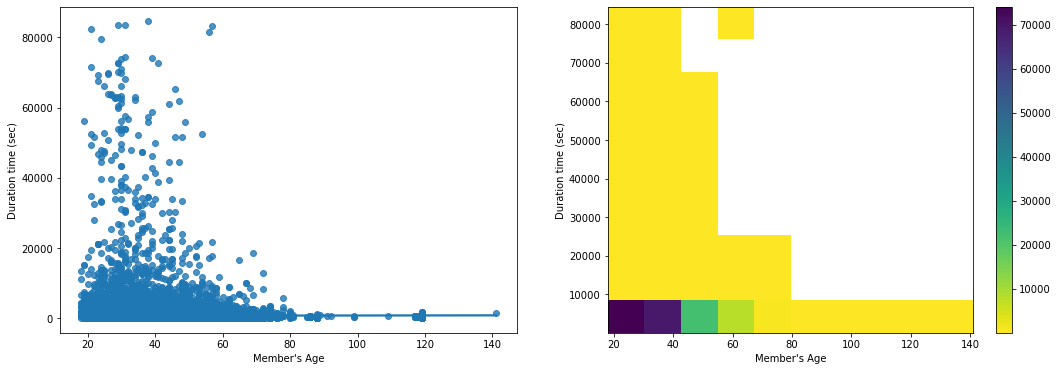

In [64]:
# Plots showing relationship between member's age and duration time
# Size of plots
plt.figure(figsize=[18, 6])

#Plot on left
plt.subplot(1,2,1)
sb.regplot(data=fordbike, x="member_birth_age", y="duration_sec")
plt.xlabel("Member's Age")
plt.ylabel("Duration time (sec)")

#Plot on the right 
plt.subplot(1,2,2)
plt.hist2d(data=fordbike, x="member_birth_age", y="duration_sec", cmin=0.5, cmap="viridis_r");
plt.colorbar()
plt.xlabel("Member's Age")
plt.ylabel("Duration time (sec)")

> People within the age of 18 and 30 had more ride duration followed riders in their 40s. 

## Relationship between user type and bike sharing

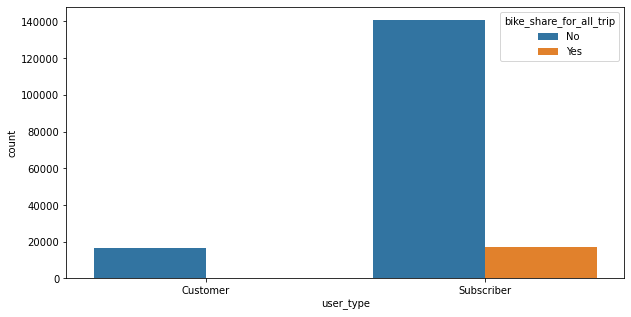

In [65]:
# Relationship between user type and bike sharing
plt.figure(figsize=[10, 5])
sb.countplot(data=fordbike, x="user_type", hue="bike_share_for_all_trip");

> Only subscribers were involved in bike sharing. Customers has no relationship with bike sharing

## What day of the week was duration time high?

Text(0.5, 1.0, 'Duration of trip with respect to day of the week')

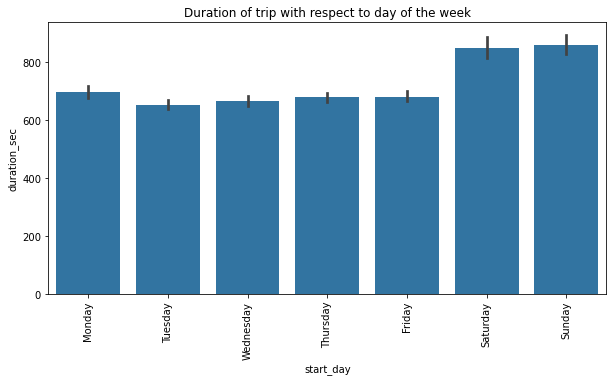

In [66]:
# Duration of trip with respect to day of the week plots
plt.figure(figsize=[10, 5])
sb.barplot(data=fordbike, x="start_day", y="duration_sec", color=base_color)
plt.xticks(rotation=90);
plt.title("Duration of trip with respect to day of the week")

> Unlike the previous univariate visualisation were saturday and sunday had the lowest number of riders. For this visualisation saturday and sunday had the highest ride duration by riders that decided to ride on these two days.

## What is the relationship between user type and duration?

Text(0.5, 1.0, 'Relation between User type and Duration(secs)')

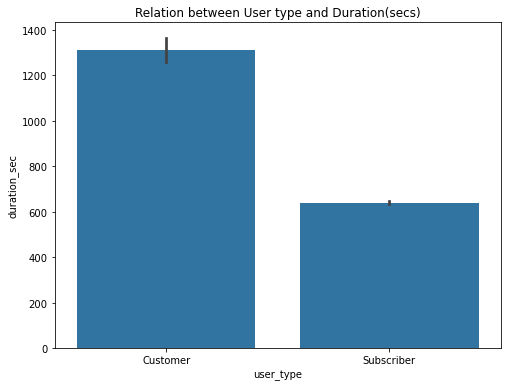

In [67]:
# Relationship between user type and duration
plt.figure(figsize=[8,6])
base_color = sb.color_palette()[0]
sb.barplot(data=fordbike, x="user_type", y="duration_sec", color=base_color)
plt.title("Relation between User type and Duration(secs)")

> From the chart, more customers spent more time riding compared to subscribers

### What is the relatioship between user type and gender?

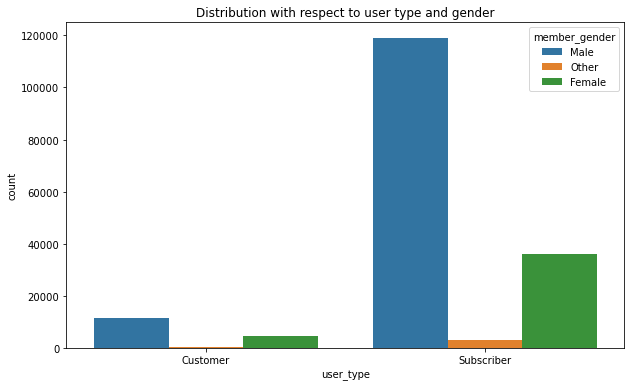

In [68]:
# Relationship between user type and gender
plt.figure(figsize=[10,6])
sb.countplot(data=fordbike, x="user_type", hue="member_gender");
plt.title("Distribution with respect to user type and gender");

We can see that males are higher in all user type, there are more males in customer type as well as subscribers type

### Multivariate Exploration

### What gender travel the longest duration with respect to user type?

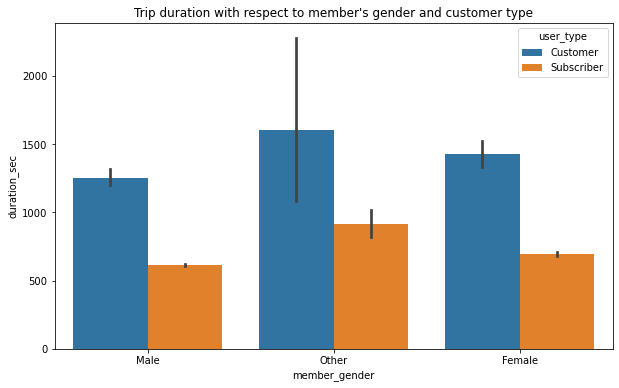

In [69]:
# clustered bar chart of member age, duration sec and user type
plt.figure(figsize=[10,6])
ax = sb.barplot(data=fordbike, x="member_gender", y="duration_sec", hue="user_type")
plt.title("Trip duration with respect to member's gender and customer type");

From this visualisation, the other gender travelled the lonest duration for customers and subscribers. Followed by femalse then males.

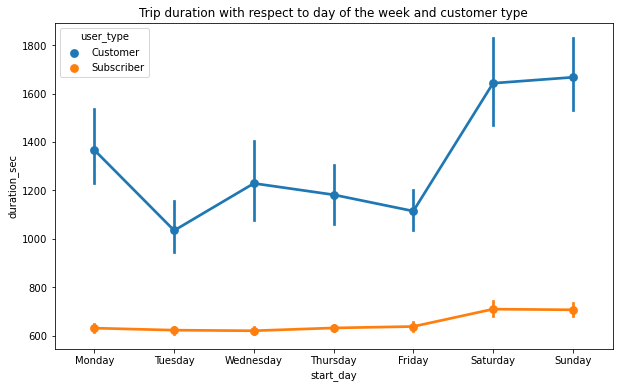

In [70]:
# Point plot of start day, duration sec and user type
plt.figure(figsize=[10,6])
ax = sb.pointplot(data=fordbike, x="start_day", y="duration_sec", hue="user_type")
plt.title("Trip duration with respect to day of the week and customer type");

From this multiplots, customers travel longes distance compared to subscribers for all days of the week. While subscribes generally travel lower distance. 

## Conclusions
- There are about 183,412 data sets which includes some Nan values. Data that are Nan are droppe before analysis
- The average duration time is 510 secs
- The youngest rider is 18 years and the oldest rider is 141 years
- There are more subscribers compared to customers
- Duration histogram is right skewed
- Most riders are in their 20's and 30's 
- Males are the most common riders
- Thursday and Tuesday has the most trips while saturday and sunday has the least trips
- Most rides were taken between the early hours of 8 amd 9 in the morning and 5 and 6 in the evening.
- For bike sharing, there were more no compared to yes
- Riders in the age range 18 to 30 had more bike duration
- Only subscribers were involved in bike sharing
- Saturday and Sunday had the highest ride duration
- Customers had the highest duration 
- Males are higher in all user type, there are more males in customer type as well as subscribers type
